PROBLEM STATEMENT :
To analyze the socio-economic and health-related factors that influence life expectancy across different countries. The goal is to understand which factors most impact a country’s average life span and how these factors vary globally. This can help governments and organizations plan better healthcare policies and interventions

TARGET COLUMN--> Life Expectancy

| Column Name                         | Description                                                                       |
| ----------------------------------- | --------------------------------------------------------------------------------- |
| **Country**                         | Name of the country.                                                              |
| **Year**                            | Year of the observation (data collected over several years).                      |
| **Status**                          | Whether the country is *Developed* or *Developing*.                               |
| \*\*Life expectancy \*\*            | Average number of years a newborn is expected to live.                            |
| **Adult Mortality**                 | Probability of dying between ages 15 and 60 per 1,000 adults.                     |
| **infant deaths**                   | Number of deaths among children under 1 year old per 1,000 live births.           |
| **Alcohol**                         | Alcohol consumption per capita (in liters) for age 15+.                           |
| **percentage expenditure**          | Expenditure on health as a percentage of GDP per capita.                          |
| **Hepatitis B**                     | Percentage of 1-year-olds immunized against Hepatitis B.                          |
| \*\*Measles \*\*                    | Number of reported measles cases per 1,000 people.                                |
| \*\* BMI \*\*                       | Average Body Mass Index of the population (kg/m²), age 18+.                       |
| \*\*under-five deaths \*\*          | Number of deaths of children under 5 years per 1,000 live births.                 |
| **Polio**                           | Percentage of 1-year-olds immunized against Polio.                                |
| **Total expenditure**               | Total government health spending as a percentage of total government expenditure. |
| \*\*Diphtheria \*\*                 | Percentage of 1-year-olds immunized against Diphtheria.                           |
| **HIV/AIDS**                        | Deaths per 1,000 people caused by HIV/AIDS.                                       |
| **GDP**                             | Gross Domestic Product per capita (in USD).                                       |
| **Population**                      | Total population of the country.                                                  |
| **thinness  1-19 years**            | Percentage of adolescents aged 10–19 who are underweight.                         |
| **thinness 5-9 years**              | Percentage of children aged 5–9 who are underweight.                              |
| **Income composition of resources** | Index measuring income, education, and life expectancy (a component of HDI).      |
| **Schooling**                       | Average number of years of schooling for people aged 25+.                         |


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Fix the import statement for matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [64]:
df=pd.read_csv('Life Expectancy Data.csv')

In [65]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [72]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [73]:
df.shape

(2938, 22)

In [74]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [76]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [77]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [78]:
df.columns = df.columns.str.strip()

In [79]:
df['Life expectancy']=df['Life expectancy'].fillna(df['Life expectancy'].median())
df['Adult Mortality']=df['Adult Mortality'].fillna(df['Adult Mortality'].median())
df['Alcohol']=df['Alcohol'].fillna(df['Alcohol'].median())
df['Hepatitis B']=df['Hepatitis B'].fillna(df['Hepatitis B'].median())
df['BMI']=df['BMI'].fillna(df['BMI'].median())
df['Polio']=df['Polio'].fillna(df['Polio'].median())
df['Total expenditure']=df['Total expenditure'].fillna(df['Total expenditure'].median())
df['Diphtheria']=df['Diphtheria'].fillna(df['Diphtheria'].median())
df['Diphtheria']=df['Diphtheria'].fillna(df['Diphtheria'].median())
df['GDP']=df['GDP'].fillna(df['GDP'].median())
df['Population']=df['Population'].fillna(df['Population'].median())
df['thinness  1-19 years']=df['thinness  1-19 years'].fillna(df['thinness  1-19 years'].median())
df['thinness 5-9 years']=df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].median())
df['Income composition of resources']=df['Income composition of resources'].fillna(df['Income composition of resources'].median())
df['Schooling']=df['Schooling'].fillna(df['Schooling'].median())

In [80]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [81]:
df.groupby('Status')['Life expectancy'].mean()


Status
Developed     79.197852
Developing    67.132028
Name: Life expectancy, dtype: float64

In [82]:
df.groupby('Country')['GDP'].mean()


Country
Afghanistan                            340.015425
Albania                               2119.726679
Algeria                               2847.853392
Angola                                1975.143045
Antigua and Barbuda                   9759.305728
                                         ...     
Venezuela (Bolivarian Republic of)    1766.947595
Viet Nam                              1766.947595
Yemen                                 1766.947595
Zambia                                 811.811841
Zimbabwe                               410.980194
Name: GDP, Length: 193, dtype: float64

In [83]:
df.groupby('Year')['Life expectancy'].mean()

Year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.280829
2014    71.536612
2015    71.616940
Name: Life expectancy, dtype: float64

In [84]:
sns.set_palette(sns.color_palette("Set3", as_cmap=False))


<Axes: xlabel='Year'>

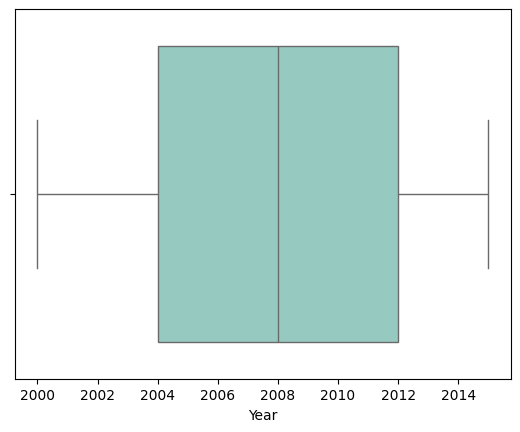

In [17]:
sns.boxplot(x="Year",data=df)

<Axes: xlabel='Life expectancy'>

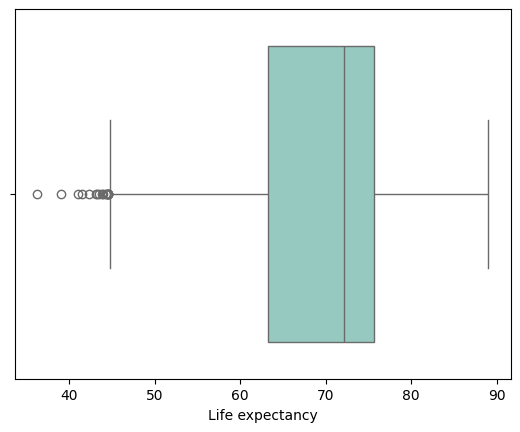

In [18]:
sns.boxplot(x="Life expectancy",data=df)


<Axes: xlabel='Adult Mortality'>

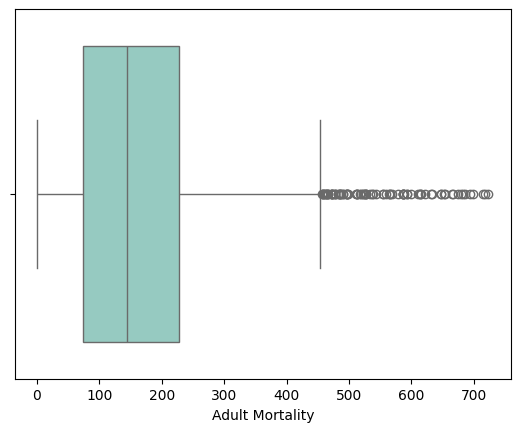

In [19]:
sns.boxplot(x="Adult Mortality",data=df)

<Axes: xlabel='infant deaths'>

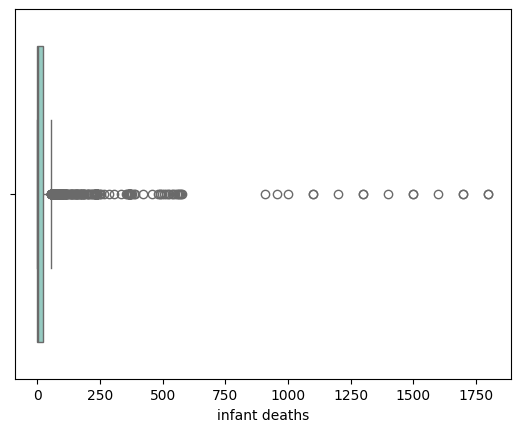

In [20]:
sns.boxplot(x="infant deaths",data=df)

<Axes: xlabel='Alcohol'>

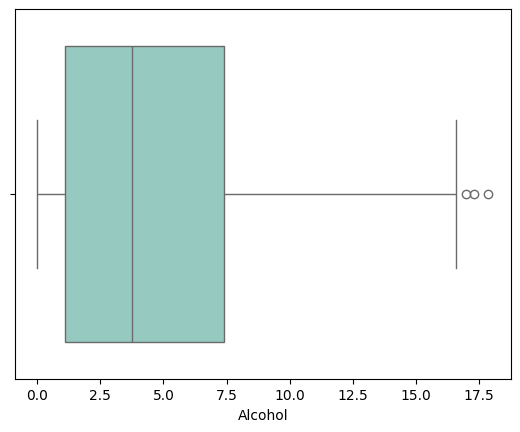

In [21]:
sns.boxplot(x="Alcohol",data=df)

<Axes: xlabel='percentage expenditure'>

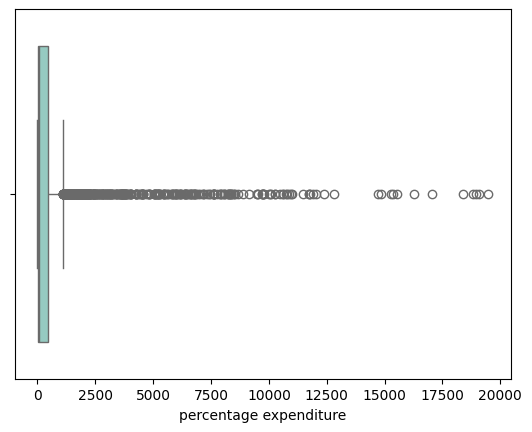

In [22]:
sns.boxplot(x="percentage expenditure",data=df)

<Axes: xlabel='Hepatitis B'>

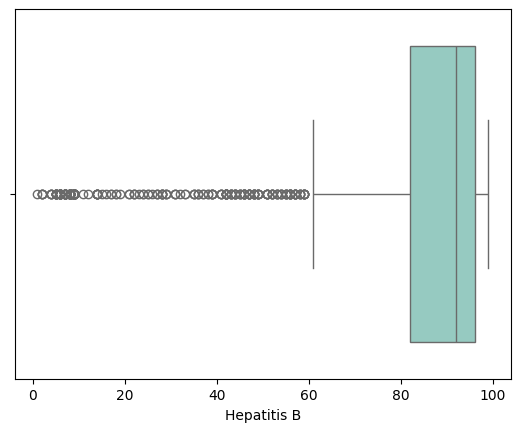

In [23]:
sns.boxplot(x="Hepatitis B",data=df)

<Axes: xlabel='Measles'>

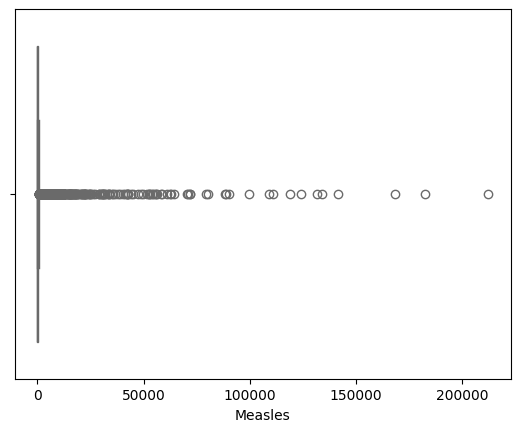

In [24]:
sns.boxplot(x="Measles",data=df)

<Axes: xlabel='BMI'>

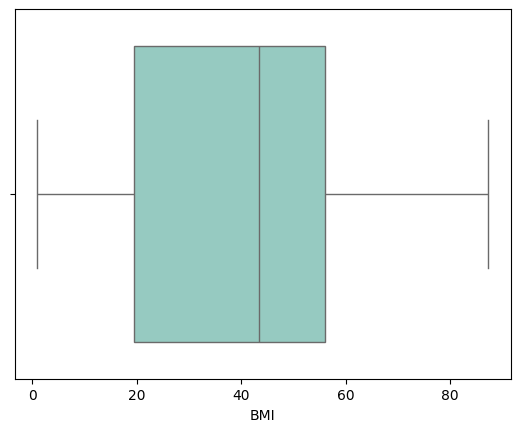

In [25]:
sns.boxplot(x="BMI",data=df)

<Axes: xlabel='under-five deaths'>

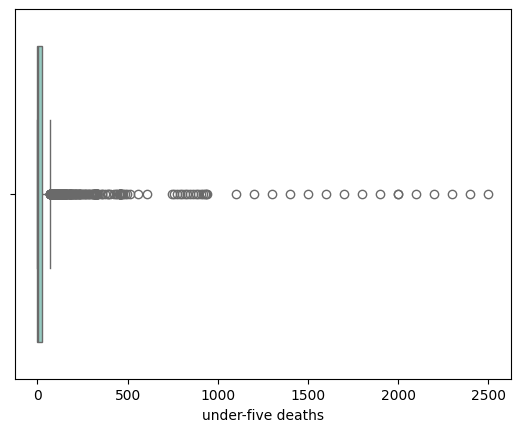

In [26]:
sns.boxplot(x="under-five deaths",data=df)

<Axes: xlabel='Polio'>

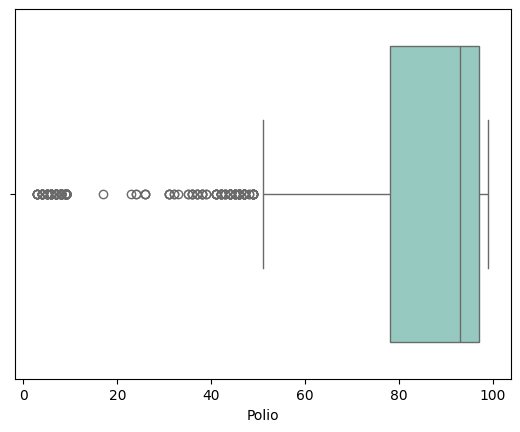

In [27]:
sns.boxplot(x="Polio",data=df)

<Axes: xlabel='Total expenditure'>

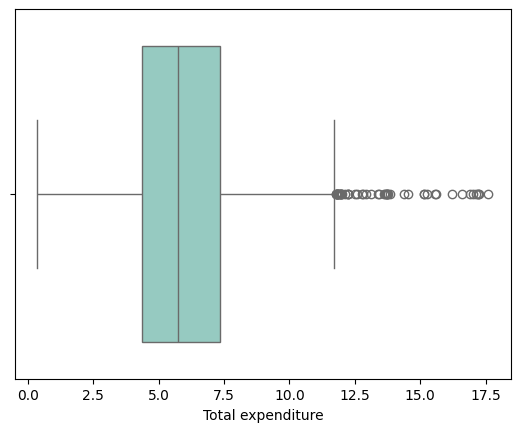

In [28]:
sns.boxplot(x="Total expenditure",data=df)

<Axes: xlabel='Diphtheria'>

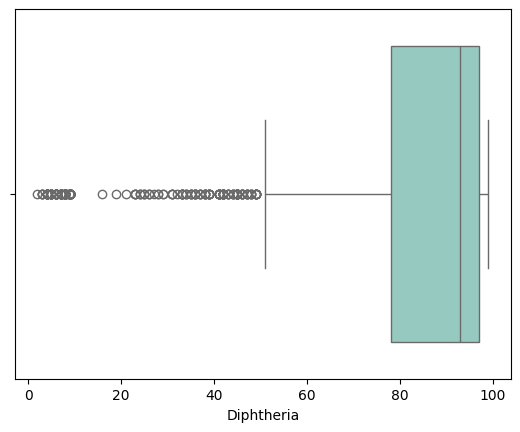

In [29]:
sns.boxplot(x="Diphtheria",data=df)

<Axes: xlabel='HIV/AIDS'>

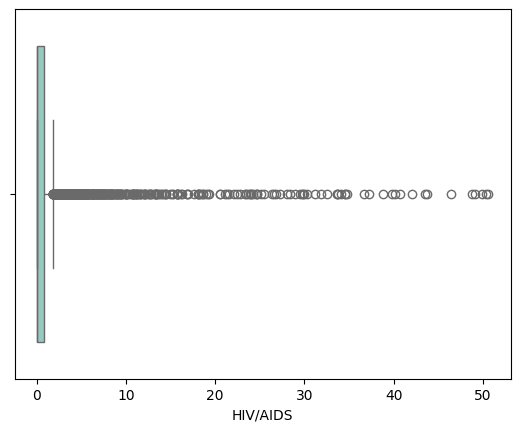

In [30]:
sns.boxplot(x="HIV/AIDS",data=df)

<Axes: xlabel='GDP'>

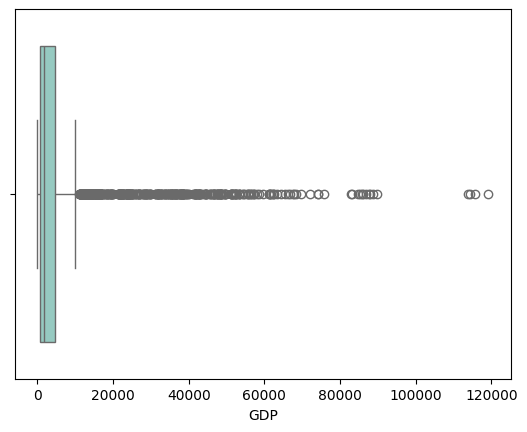

In [31]:
sns.boxplot(x="GDP",data=df)

<Axes: xlabel='Population'>

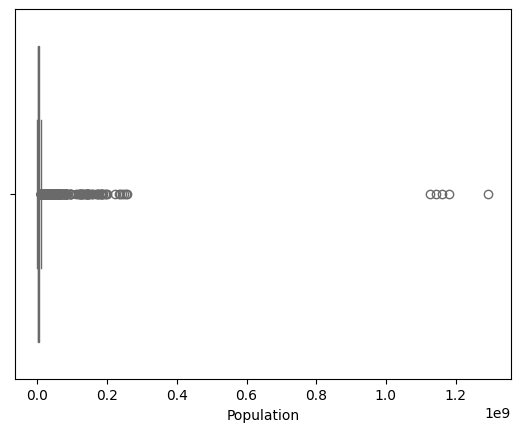

In [32]:
sns.boxplot(x="Population",data=df)

<Axes: xlabel='thinness  1-19 years'>

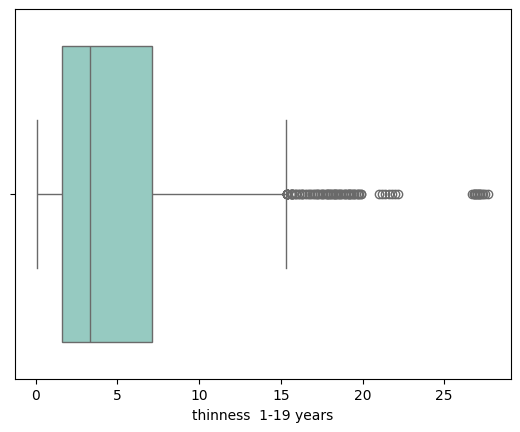

In [33]:
sns.boxplot(x="thinness  1-19 years",data=df)

<Axes: xlabel='thinness 5-9 years'>

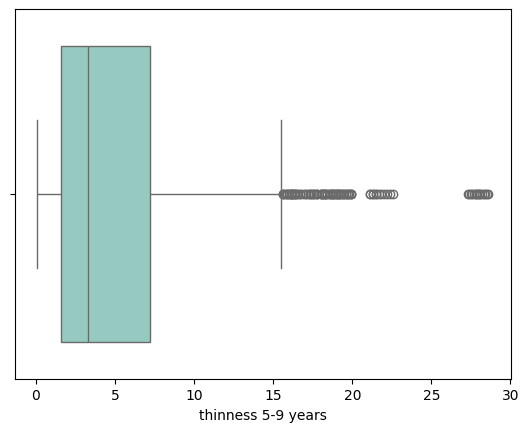

In [34]:
sns.boxplot(x="thinness 5-9 years",data=df)

<Axes: xlabel='Income composition of resources'>

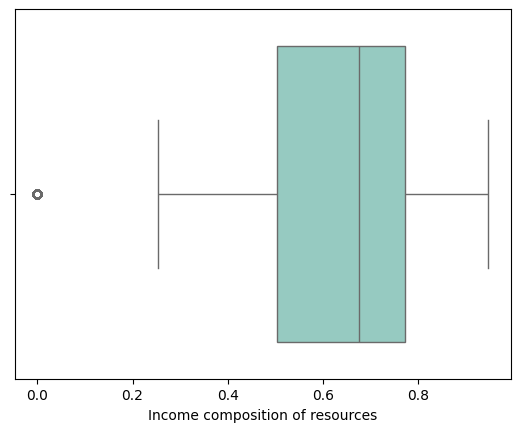

In [35]:
sns.boxplot(x="Income composition of resources",data=df)

<Axes: xlabel='Schooling'>

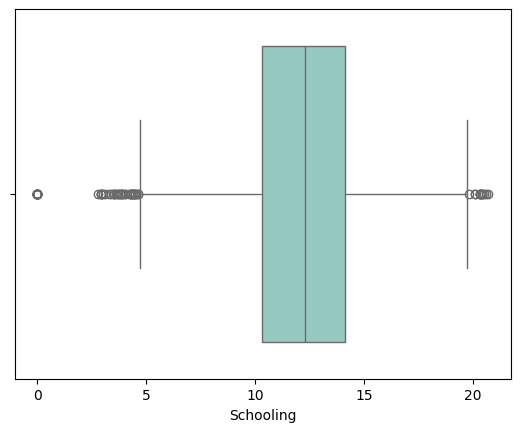

In [36]:
sns.boxplot(x="Schooling",data=df)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [38]:
reasons=[
    'Adult Mortality',
       'infant deaths', 
         'Alcohol',
         'percentage expenditure', 
         'Hepatitis B',
       'Measles ', 
         ' BMI ',
         'under-five deaths ', 
         'Polio'
]

Distribution of Life Expectancy

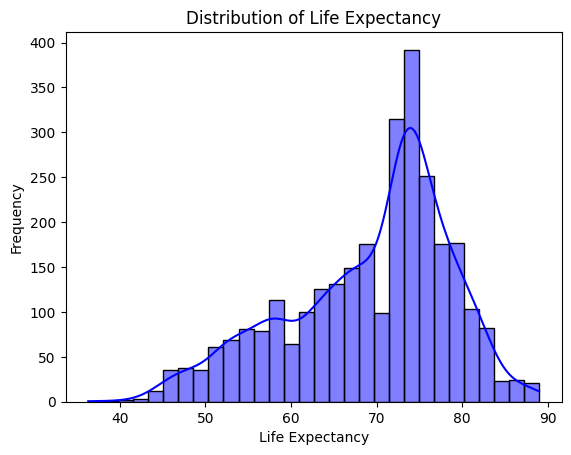

In [39]:
sns.histplot(df['Life expectancy'], bins=30, kde=True, color='blue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


Top 10 Countries with Highest  GDP

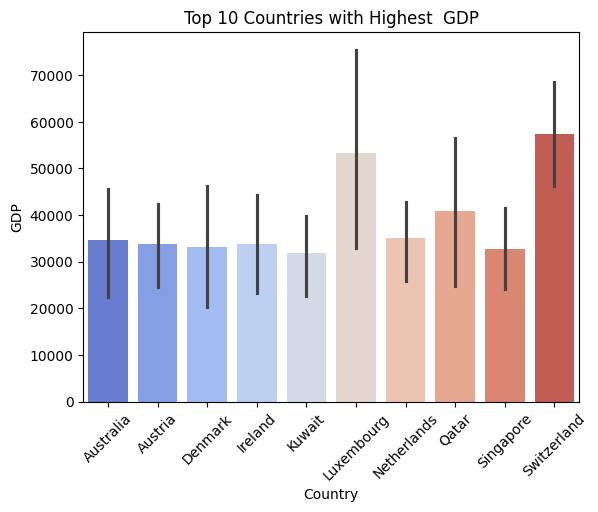

In [40]:
top10 = df.groupby('Country')['GDP'].mean().nlargest(10).index

# Step 2: Filter the data
df_top10 = df[df['Country'].isin(top10)]

# Step 3: Plot
sns.barplot(x='Country', y='GDP', data=df_top10, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Highest  GDP')
plt.show()

Countries with highest and lowest life expectancy

<Axes: ylabel='Country'>

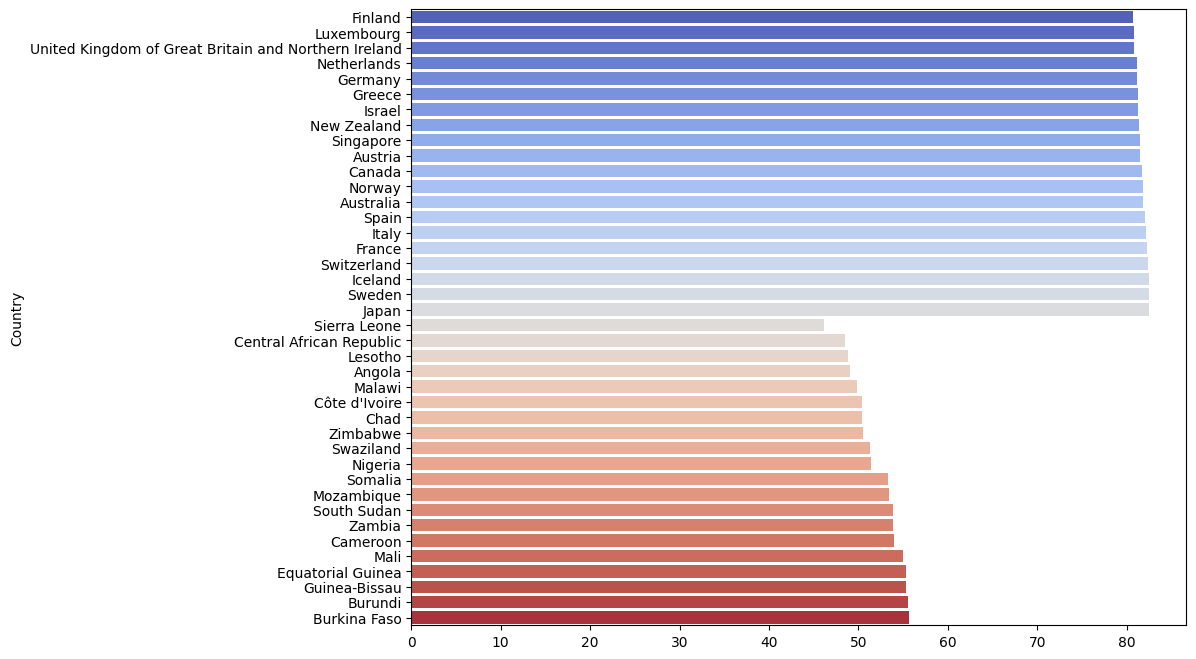

In [41]:
country_life_exp = df.groupby('Country')['Life expectancy'].mean().sort_values()
top_10 = country_life_exp.head(20)
bottom_10 = country_life_exp.tail(20)
combined = pd.concat([bottom_10, top_10])
plt.figure(figsize=(10, 8))
sns.barplot(x=combined.values, y=combined.index, palette='coolwarm')


How has life expectancy changed over the years globally

Text(0.5, 1.0, ' Life expectancy VS Year')

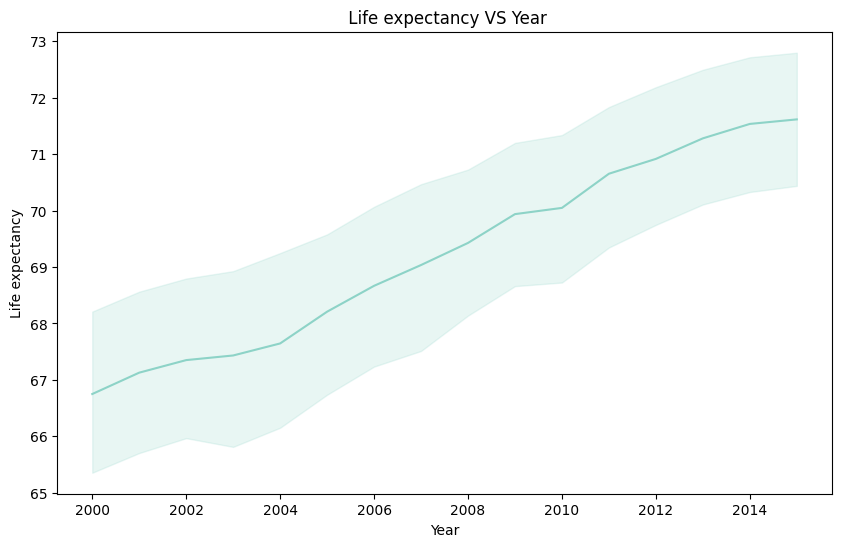

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Life expectancy', data=df)
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title(' Life expectancy VS Year')


Text(0.5, 1.0, 'Density Plot of Adult Mortality')

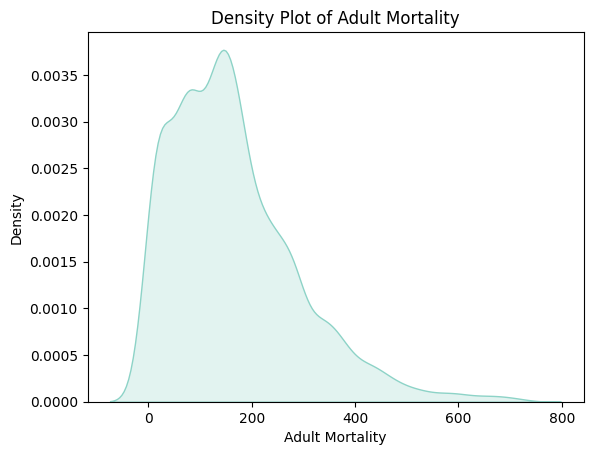

In [43]:
sns.kdeplot(df['Adult Mortality'], shade=True, palette='crest')
plt.title('Density Plot of Adult Mortality')

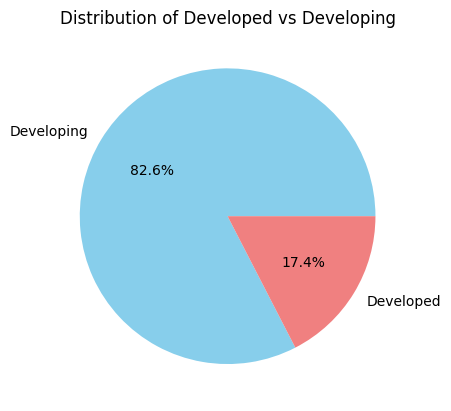

In [44]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Developed vs Developing')
plt.ylabel('')
plt.show()

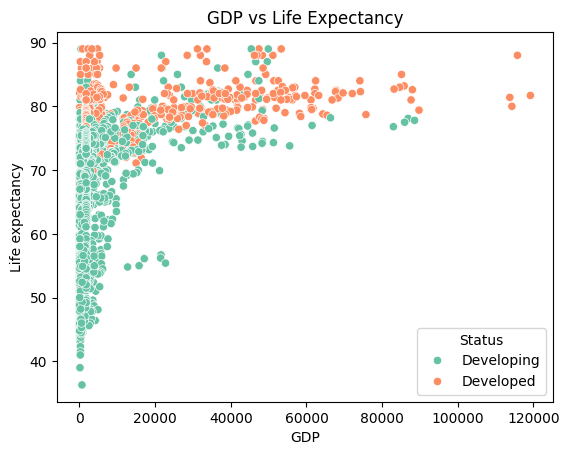

In [45]:
sns.scatterplot(x='GDP', y='Life expectancy', hue='Status', data=df,palette='Set2')
plt.title('GDP vs Life Expectancy')
plt.show()


How Does alcohol consumption impact life expectancy

Text(0, 0.5, 'Average Alcohol Consumption (litres per capita)')

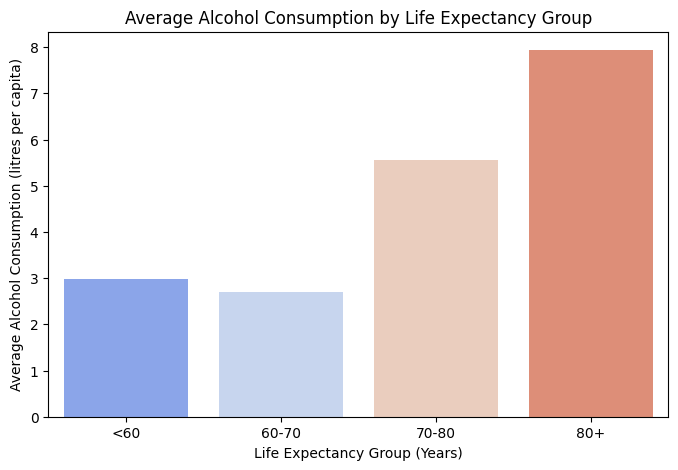

In [46]:
df['LifeExp_Bin'] = pd.cut(df['Life expectancy'], bins=[0, 60, 70, 80, 90], labels=['<60', '60-70', '70-80', '80+'])
grouped = df.groupby('LifeExp_Bin')['Alcohol'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='LifeExp_Bin', y='Alcohol', palette='coolwarm')
plt.title('Average Alcohol Consumption by Life Expectancy Group')
plt.xlabel('Life Expectancy Group (Years)')
plt.ylabel('Average Alcohol Consumption (litres per capita)')

Text(0, 0.5, 'Mean Life Expectancy (years)')

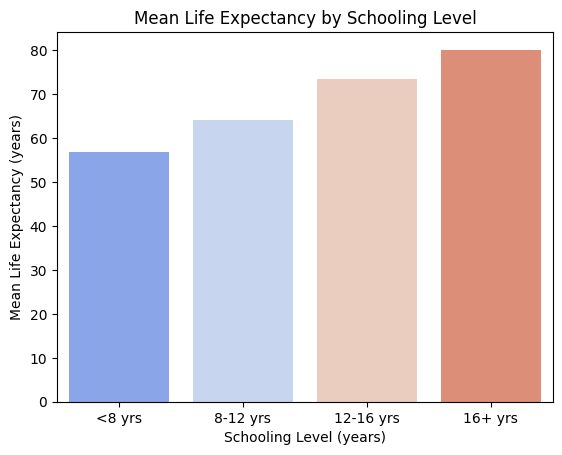

In [47]:
df['Schooling_Bin'] = pd.cut(df['Schooling'], bins=[0, 8, 12, 16, 20], labels=['<8 yrs', '8-12 yrs', '12-16 yrs', '16+ yrs'])
grouped_sch = df.groupby('Schooling_Bin')['Life expectancy'].mean().reset_index()
sns.barplot(data=grouped_sch, x='Schooling_Bin', y='Life expectancy', palette='coolwarm')
plt.title('Mean Life Expectancy by Schooling Level')
plt.xlabel('Schooling Level (years)')
plt.ylabel('Mean Life Expectancy (years)')


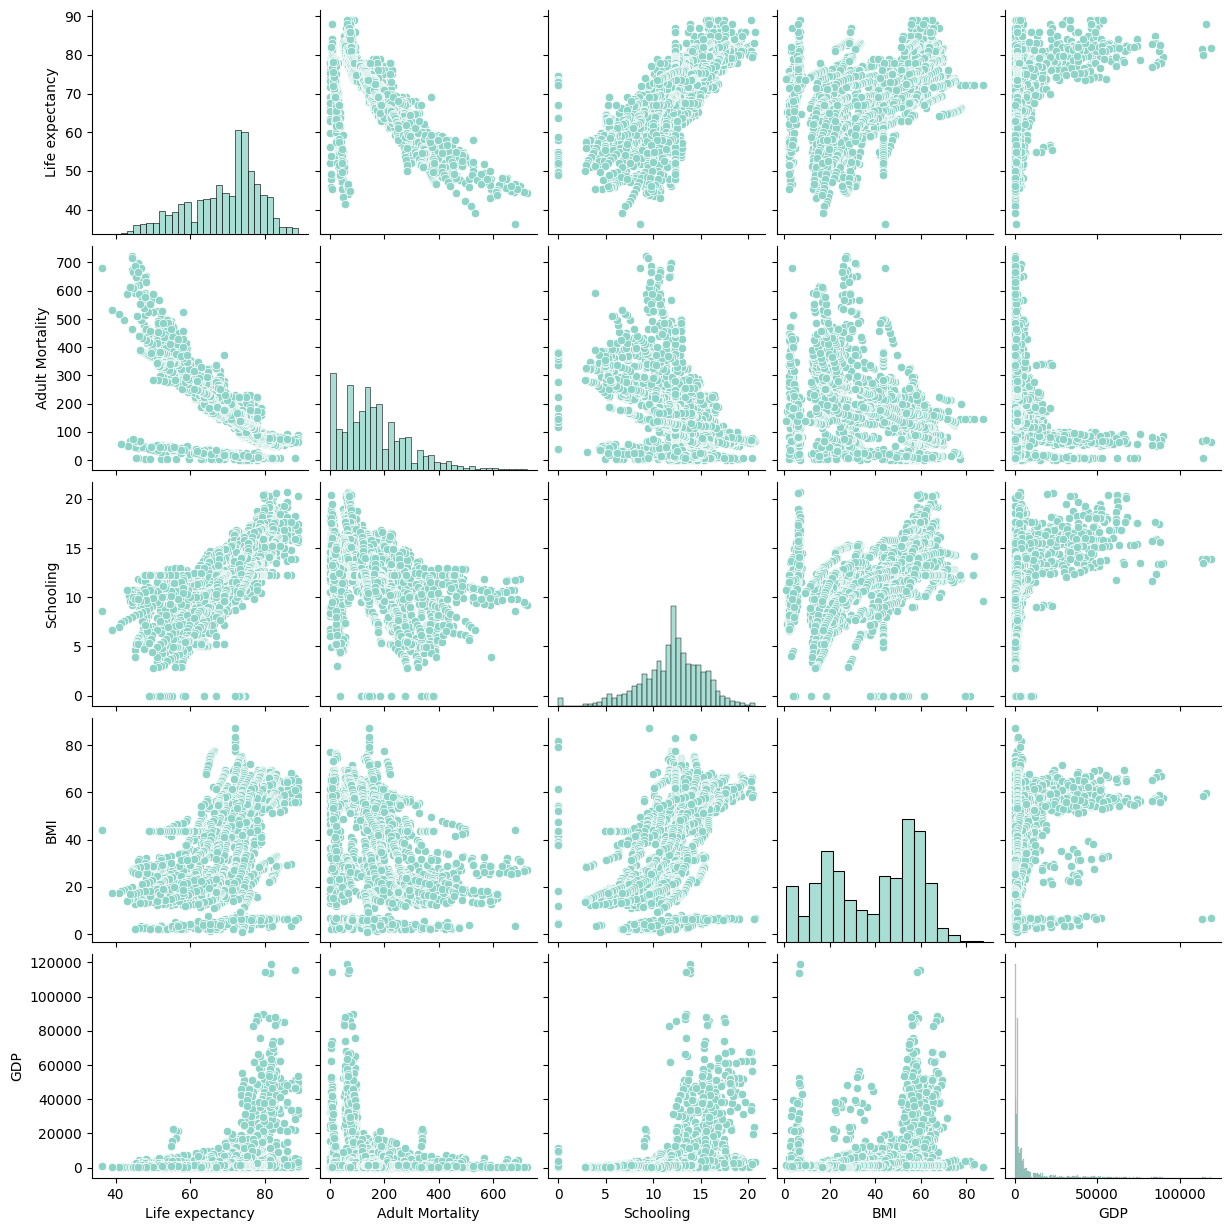

In [48]:
sns.pairplot(df[['Life expectancy', 'Adult Mortality', 'Schooling', 'BMI', 'GDP']])


In [49]:
num=df.select_dtypes(include='number')
num

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [50]:
correl=num.corr()
correl

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,-0.042937,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Life expectancy,0.170819,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,-0.222738,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,0.094280,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,0.996629,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,-0.109790,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,0.031400,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,-0.087852,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,0.021302,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,-0.170549,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,0.507809,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,-0.237048,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806
under-five deaths,-0.042937,-0.222738,0.094280,0.996629,-0.109790,-0.087852,-0.170549,0.507809,-0.237048,1.000000,-0.188864,-0.127960,-0.195808,0.038062,-0.106093,0.539260,0.466697,0.471167,-0.159264,-0.206242


<Axes: >

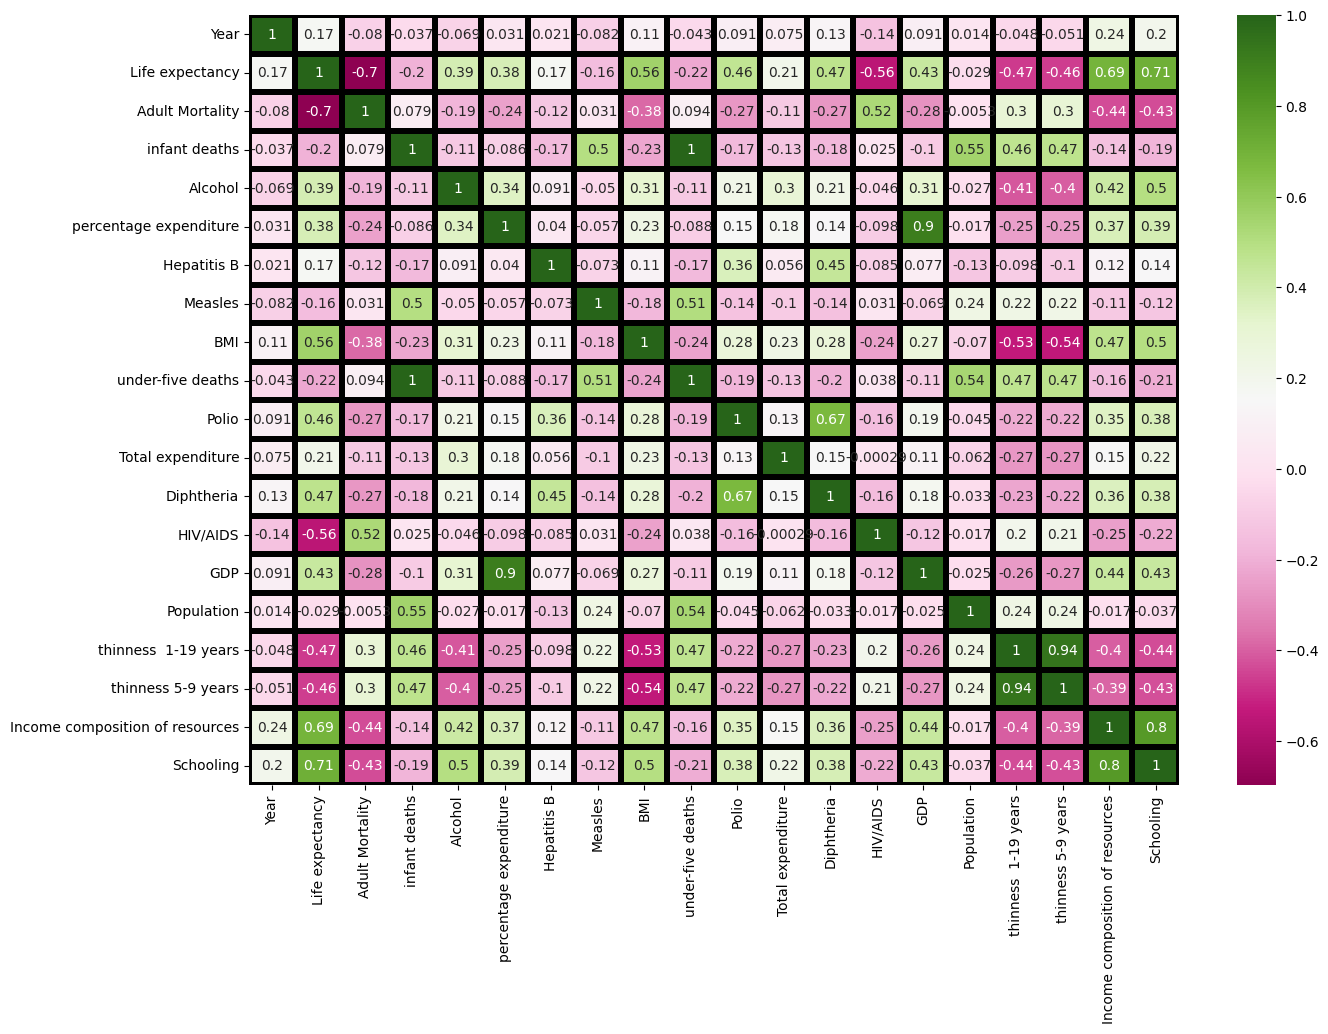

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(num.corr(),annot=True,linewidths=4,linecolor='k',cmap='PiYG')

most correlated are:
1) "thinness 1-19 years" and "thinness 5-9 years"
2) "Schooling" and "Life expectancy"
3) "Schooling" and "Income composition of resources"

FEATURE ENGINEERING

In [85]:
dataset=pd.get_dummies(df,dtype=int,drop_first=True) 
dataset

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,0,0,0,0,0,0,0,0,1,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,0,0,0,0,0,0,0,0,1,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,0,0,0,0,0,0,0,0,1,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,0,0,0,0,0,0,0,0,1,1


In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 213 entries, Year to Status_Developing
dtypes: float64(16), int64(197)
memory usage: 4.8 MB


In [87]:
X=dataset.drop(['Life expectancy'],axis=1)
Y=dataset['Life expectancy']

In [88]:
x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [89]:
print('Shape of X train is-', x_train.shape)

print('Shape of X_test is-', x_test.shape)

print('Shape of y_train is-' ,y_train.shape)

print('Shape of y_test is-', y_test.shape)

Shape of X train is- (2350, 212)
Shape of X_test is- (588, 212)
Shape of y_train is- (2350,)
Shape of y_test is- (588,)


In [90]:
reg = LinearRegression()

In [91]:
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [92]:
reg.predict(x_test)

array([66.66781938, 62.14805804, 55.44270568, 67.81724168, 67.91593719,
       72.55057287, 79.2750775 , 72.56297731, 68.60684448, 71.49790063,
       70.89277139, 65.35305568, 60.01504687, 59.70005473, 63.31846219,
       76.14716827, 63.92741194, 63.3277886 , 64.60730834, 79.90536831,
       64.91325124, 70.32990475, 55.06312602, 43.30535998, 49.67801333,
       82.94278568, 78.19991074, 64.35594812, 67.74375348, 75.77283336,
       62.63617466, 62.10194857, 75.1244402 , 46.81470485, 56.67017414,
       76.3002213 , 73.80519313, 70.31717173, 63.62443596, 81.90501689,
       46.74765015, 73.55105963, 66.17200288, 70.29732009, 75.24848441,
       76.07738792, 69.40125245, 53.33739995, 74.13023976, 70.79459111,
       75.17907336, 70.89457622, 50.27870476, 74.34818681, 81.88319261,
       70.08584193, 74.9159329 , 72.74208185, 73.16642593, 66.04732597,
       74.41906573, 75.50520679, 63.49567215, 75.70943098, 63.48239269,
       83.31015076, 67.48430479, 77.95719878, 68.74328745, 58.98

In [93]:
r2_score(y_test,reg.predict(x_test))

0.9530012171314468

95 %